In [1]:
import sys
sys.path.append('../..')
from matplotlib import pyplot as plt
import numpy as np

from heat_load_calc.core import infiltration

In [2]:
plt.style.use('seaborn-whitegrid')

# 概要

以下のパラメータから各室のすきま風量(m<sup>3</sup>/s)を計算する。  
※ すきま風量には機械換気の風量は含まれない

# 関数の使い方

    Args:
        c_value: 相当隙間面積, cm2/m2
        v_room_is: 室気積, m3, [i,1]
        story: 階
        inside_pressure: 室内側の圧力 = 'negative', 'positive' or 'balanced'
       theta_r_is_n: 時刻nの室温, degree C, [i,1]
       theta_o_npls: 時刻n+1の外気温度, degree C

    Returns:
        すきま風量, m3/s, [i,1]

# 使用例

## 使用例1

In [3]:
v = infiltration.get_infiltration(
    c_value=2.0,
    v_room_is=np.array([[50.0], [20.0], [60.0]]),
    story=2,
    inside_pressure='negative',
    theta_r_is_n=np.array([[20.0], [18.0], [15.0]]),
    theta_o_npls=0.0
)

v

array([[0.00051083],
       [0.00020433],
       [0.00061299]])

# 解析例

## 解析例1

- C値: 2.0
- 部屋の容量: 50, 20, 30 m<sup>2</sup>
- 2階建て
- 室内温度: 20, 18, 15 ℃

In [4]:
theta_r_is_n = np.array([[20.0], [18.0], [15.0]])

In [5]:
def example1(t_o, inside_pressure):
    
    v_room_cap_is = np.array([[50.0], [20.0], [30.0]])

    v = infiltration.get_infiltration(
        c_value=2.0,
        v_room_is=np.array([[50.0], [20.0], [30.0]]),
        story=2,
        inside_pressure=inside_pressure,
        theta_r_is_n=theta_r_is_n,
        theta_o_npls=t_o
    )
    
    return np.sum(v) / np.sum(v_room_cap_is) * 3600

In [6]:
theta_o = [x for x in range(-10,20)]

In [7]:
x1 = np.average(theta_r_is_n) - theta_o
y1 = [example1(t_o=t_o, inside_pressure='balanced') for t_o in theta_o]
y2 = [example1(t_o=t_o, inside_pressure='positive') for t_o in theta_o]
y3 = [example1(t_o=t_o, inside_pressure='negative') for t_o in theta_o]

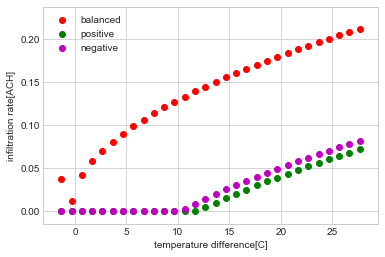

In [8]:
fig1 = plt.figure()
ax1 = fig1.subplots()

ax1.scatter(x1, y1, c="r", label="balanced")
ax1.scatter(x1, y2, c="g", label="positive")
ax1.scatter(x1, y3, c="m", label="negative")

ax1.set_xlabel('temperature difference[C]')
ax1.set_ylabel('infiltration rate[ACH]')

plt.legend()
plt.show()

In [9]:
def example2(c_value, inside_pressure):
    
    v_room_cap_is = np.array([[50.0], [20.0], [30.0]])

    v = infiltration.get_infiltration(
        c_value=c_value,
        v_room_is=np.array([[50.0], [20.0], [30.0]]),
        story=2,
        inside_pressure=inside_pressure,
        theta_r_is_n= np.array([[20.0], [20.0], [20.0]]),
        theta_o_npls=0.0
    )
    
    return np.sum(v) / np.sum(v_room_cap_is) * 3600

In [12]:
c_value = [x*0.1 for x in range(1,50)]
x1 = c_value
y1 = [example2(c_value=c, inside_pressure='balanced') for c in c_value]
y2 = [example2(c_value=c, inside_pressure='positive') for c in c_value]
y3 = [example2(c_value=c, inside_pressure='negative') for c in c_value]

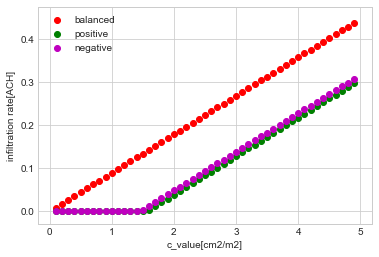

In [13]:
fig2 = plt.figure()
ax2 = fig2.subplots()

ax2.scatter(x1, y1, c="r", label="balanced")
ax2.scatter(x1, y2, c="g", label="positive")
ax2.scatter(x1, y3, c="m", label="negative")

ax2.set_xlabel('c_value[cm2/m2]')
ax2.set_ylabel('infiltration rate[ACH]')

plt.legend()
plt.show()